<a href="https://colab.research.google.com/github/matthewshawnkehoe/Data-Analysis/blob/main/chapter11_part01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and a lot of edits made my Matthew Kehoe.

This notebook was generated for TensorFlow 2.6.

# Deep learning for text

This chapter will cover:

* <font color='blue'>Preprocessing text data</font> for machine learning applications
* <font color='blue'>Bag-of-words</font> approaches and <font color='blue'>sequence-modeling</font> approaches for text  processing
* The <font color='blue'>Transformer</font> architecture
* <font color='blue'>Sequence-to-sequence</font> learning

## Natural-language processing: The bird's eye view

In  computer  science,  we  refer  to  human  languages,  like  English  or  Mandarin,  as <font color='blue'>natural</font>  languages,  to  distinguish  them  from  languages  that  were  designed  for machines,  like  Assembly,  LISP,  or  XML.  Every  machine  language  was <font color='blue'>designed</font>:  its starting point was a human engineer writing down a set of formal rules to describe
what statements you could make in that language and what they meant. <font color='blue'>Rules came first</font> ,  and  people  only  started  using  the  language  once  the  rule  set  was  complete. With human language, it's the reverse: usage comes first, rules arise later. <font color='blue'>Natural language</font>  was  shaped  by  an  <font color='blue'>evolution</font>  process,  much  like  biological  organisms—
that's what makes it “natural.” Its “rules,” like the grammar of English, were formalized  after  the fact  and are  often  ignored or  broken  by its  users. As  a  result,  while machine-readable language is highly structured and rigorous, using precise syntactic
rules to weave together exactly defined concepts from a fixed vocabulary, natural language is <font color='blue'>messy—ambiguous, chaotic, sprawling,</font> and constantly in flux.

Creating  algorithms  that  can  make  sense  of  natural  language  is  a  big  deal:  language,  and  in  particular  text,  underpins  most  of  our  communications  and  our  cultural production. The <font color='blue'>internet is mostly text</font>. Language is how we store almost all of our knowledge. Our very thoughts are largely built upon language. However, the ability  to  understand  natural  language  has  long  eluded  machines.  Some  people  once naively thought that you could simply write down the “rule set of English,” much like one can write down the rule set of LISP. Early attempts to build natural language processing (NLP) systems were thus made through the lens of “applied linguistics.” Engineers and linguists would handcraft complex  sets of rules to perform basic machine
translation  or  create  simple  chatbots—like  the  famous  ELIZA  program  from  the <font color='blue'>1960s</font>, which used <font color='blue'>pattern matching</font> to sustain very <font color='blue'>basic conversation</font>. But language is a  rebellious  thing:  it's  not  easily  pliable  to  formalization.  After  several  decades  of
effort, the capabilities of these systems remained disappointing.

Handcrafted  rules  held  out  as  the  dominant  approach  well  into  the  1990s.  But  starting in the late 1980s, faster computers and greater data availability started making a better alternative viable. When you find yourself building systems that are big piles of ad hoc rules, as a clever engineer, you're likely to start asking: “Could I use a corpus of  data  to  automate  the  process  of  finding  these  rules?  Could  I  search  for  the  rules within some kind of rule space, instead of having to come up with them myself?” And just like that, you've graduated to doing machine learning. And so, in the <font color='blue'>late 1980s</font>, we started seeing <font color='blue'>machine learning approaches</font> to natural language processing. The earliest  ones  were  based  on  decision  trees—the  intent  was  literally  to  automate  the development  of  the  kind  of  if/then/else  rules  of  previous  systems.  Then  statistical
approaches started gaining speed, starting with logistic regression. Over time, <font color='blue'>learned parametric models</font> fully took over, and linguistics came to be seen as more of a hindrance than a useful tool. Frederick Jelinek, an early speech recognition researcher, joked in the 1990s: “Every time I fire a linguist, the performance of the speech recognizer goes up.

That's  what  modern  <font color='blue'>NLP</font>  is  about:  <font color='blue'>using  machine  learning</font>  and  <font color='blue'>large  datasets</font>  to  give computers the ability not to *understand* language, which is a more lofty goal, but to <font color='blue'>ingest a piece of language</font> as input and return something useful, like predicting the following:

* “What's the topic of this text?” (text classification)
* “Does this text contain abuse?” (content filtering)
* “Does this text sound positive or negative?” (sentiment analysis)
* “What should be the next word in this incomplete sentence?” (language modeling)
* “How would you say this in German?” (translation)
* “How would you summarize this article in one paragraph?” (summarization)
* etc.

Of course, keep in mind throughout this chapter that the text-processing models you will train won't possess a human-like understanding of language; rather, they simply look for <font color='blue'>statistical regularities</font> in their input data, which turns out to be sufficient to perform well on many simple tasks. In much the same way that <font color='blue'>computer vision</font> is pattern recognition applied to <font color='blue'>pixels</font>, <font color='blue'>NLP</font> is pattern recognition applied to <font color='blue'>words, sentences, and paragraphs</font>.

The  toolset  of  NLP—decision  trees,  logistic  regression—only  saw  slow  evolution from the 1990s to the early 2010s. Most of the research focus was on feature engineering.  When  I  won  my  first  NLP competition  on  Kaggle  in  2013,  my  model  was,  you guessed  it,  based  on  decision  trees  and  logistic  regression.  However,  around  <font color='blue'>2014—2015</font>,  things  started  changing  at  last.  Multiple  researchers  began  to  investigate  the language-understanding capabilities of recurrent neural networks, in particular <font color='blue'>LSTM</font>—
a sequence-processing algorithm from the late 1990s that had stayed under the radar until then.

In early 2015, Keras made available the first open source, easy-to-use implementation of LSTM, just at the start of a massive wave of renewed interest in recurrent neural networks—until then, there had only been “research code” that couldn't be readily reused. Then from <font color='blue'>2015 to 2017</font>, recurrent neural networks dominated the booming NLP scene. <font color='blue'>Bidirectional LSTM</font> models, in particular, set the state of the art on many important tasks, from summarization to question-answering to machine translation.

Finally,  around  <font color='blue'>2017—2018</font>,  a  new  architecture  rose  to  replace  RNNs:  the  <font color='blue'>Transformer</font>,  which  you  will  learn  about  in  the  second  half  of  this  chapter.  Transformers unlocked considerable progress across the field in a short period of time, and today
most NLP systems are based on them.

Let's dive into the details. This chapter will take you from the very basics to doing machine translation with a Transformer.

## Preparing text data

Deep learning models, being <font color='blue'>differentiable</font> functions, can only process <font color='blue'>numeric tensors</font>:  they  can't  take   raw  text  as  input. <font color='blue'>Vectorizing</font>  text  is  the  process  of  transforming
text  into  numeric  tensors.  Text  vectorization  processes  come  in  many  shapes  and forms, but they all follow the same template (see figure below):

* First, you <font color='blue'>standardize</font> the text to make it easier to process, such as by converting it to lowercase or removing punctuation.
* You split the text into units (called <font color='blue'>tokens</font>), such as characters, words, or groups of words. This is called *tokenization*.
* You convert each such token into a numerical vector. This will usually involve first <font color='blue'>indexing</font> all tokens present in the data.

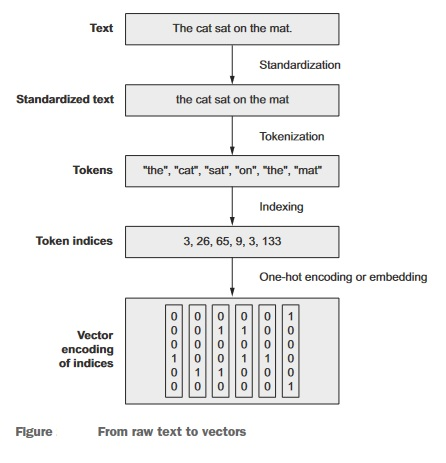

Let's review each of these steps.

### Text standardization

Consider these two sentences:

* “sunset came. i was staring at the Mexico sky. Isnt nature splendid??”
* “Sunset came; I stared at the México sky. Isn't nature splendid?”

They're very similar—in fact, they're almost identical. Yet, if you were to convert them to <font color='blue'>byte strings</font>, they would end up with very different representations, because “i” and “I” are two different characters, “Mexico” and “México” are two different words, “isnt” isn't “isn't,” and so on. A machine learning model doesn't know a priori that “i” and
“I” are the same letter, that “é” is an “e” with an accent, or that “staring” and “stared” are two forms of the same verb.

<font color='blue'>Text  standardization</font>  is  a  basic  form  of  feature  engineering  that  aims  to  <font color='blue'>erase  encoding  differences</font>  that  you  don't  want  your  model  to  have  to  deal  with.  It's  not exclusive  to  machine  learning,  either—you'd  have  to  do  the  same  thing  if  you  were building a search engine.

One of the simplest and most widespread standardization  schemes is “convert to lowercase and remove punctuation characters.” Our two sentences would become

* “sunset came i was staring at the mexico sky isnt nature splendid”
* “sunset came i stared at the méxico sky isnt nature splendid”

Much closer already. Another common transformation is to convert <font color='blue'>special characters</font> to a <font color='blue'>standard form</font>, such as replacing “é” with “e,” “æ” with “ae,” and so on. Our token “méxico” would then become “mexico”.

Lastly, a much more advanced standardization pattern that is more rarely used in a machine learning context is <font color='blue'>stemming</font>: converting variations of a term (such as different  conjugated  forms  of  a  verb)  into  a  single  shared  representation,  like  turning “caught”  and  “been  catching”  into  “[catch]”  or  “cats”  into  “[cat]”.  With  stemming,
“was staring” and “stared” would become something like “[stare]”, and our two similar sentences would finally end up with an identical encoding:

* “sunset came i [stare] at the mexico sky isnt nature splendid”

With these standardization techniques, your model will require <font color='blue'>less training data</font> and will <font color='blue'>generalize  better</font>—it won't  need  abundant  examples of  both  “Sunset”  and  “sunset” to learn that they mean the same thing, and it will be able to make sense of “México” even if it has only seen “mexico” in its training set. Of course, standardization may
also  erase  some  amount  of  information,  so  always  keep  the  context  in  mind:  for instance,  if  you're  writing  a  model  that  <font color='blue'>extracts  questions</font>  from  interview  articles,  it should definitely treat <font color='blue'>?</font> as a separate token instead of dropping it, because it's a useful signal for this specific task.

**Remark:** To store the human-readable characters on computers, we need to <font color='blue'>encode</font> them into <font color='blue'>bytes</font>. The rule that defines the encoding process is called encoding schema and commonly used ones include <font color='blue'>ASCII, UTF-8,</font> etc. ASCII converts each character into one byte. As one byte consists of 8 bits and each bit contains a 0 or 1, the total number of <font color='blue'>characters</font> ASCII can represent is <font color='blue'>2⁸=256</font>. This is more than enough for 26 English letters plus some commonly-used characters. See the [ASCII table](https://www.rapidtables.com/code/text/ascii-table.html) for more information.

However, 256 characters are not enough for storing all the characters available to us. In light of that, people designed <font color='blue'>Unicode</font> in which each character will be encoded as a <font color='blue'>code point</font>. For instance, “H” will be represented as code point “U+0048”. According to [Wikipedia](https://en.wikipedia.org/wiki/Unicode), Unicode can include <font color='blue'>144,697 characters</font>. But again, the code point still can not be recognized by the computer, so we have “UTF-8” or other variants encoding schema to convert the code point to the byte. UTF-8 means the minimum length of bits to represent a character is 8. Therefore, in a similar manner, UTF-16 means the minimum length of bits is 16.

There are many other formats to store characters on a computer.

### Text splitting (tokenization)

Once  your  text  is  standardized,  you  need  to  break  it  up  into  units  to  be  <font color='blue'>vectorized</font>(tokens), a step called <font color='blue'>tokenization</font>. You could do this in three different ways:

* <font color='blue'>Word-level  tokenization</font>—Where  tokens  are  space-separated  (or  punctuation-separated)  substrings.  A  variant  of  this  is  to  further  split  words  into  subwords when  applicable—for  instance,  treating  “staring”  as  “star+ing”  or  “called”  as“call+ed.”
* <font color='blue'>N-gram  tokenization</font>—Where  tokens  are  groups  of N  consecutive  words.  For instance, “the cat” or “he was” would be 2-gram tokens (also called bigrams).
* <font color='blue'>Character-level tokenization</font>—Where each  character is its  own token.  In  practice, this scheme is rarely used, and you only really see it in specialized contexts, like text generation or speech recognition.

In general, you'll always use either <font color='blue'>word-level</font> or <font color='blue'>N-gram tokenization</font>. There are two kinds of text-processing models: those that <font color='blue'>care</font> about <font color='blue'>word order</font>, called <font color='blue'>sequence models</font>, and those that treat <font color='blue'>input words as a set</font>, discarding their original order, called <font color='blue'>bag-of-words models</font>. If you're building a sequence model, you'll use word-level tokenization, and if you're building a bag-of-words model, you'll use N-gram tokenization. N-grams are a way to artificially inject a small amount of local word order information into the model. Throughout this chapter, you'll learn more about each type of model and when to use them.

### Vocabulary indexing

Word N-grams are <font color='blue'>groups of N (or fewer)</font> consecutive words that you can extract from a sentence. The same concept may also be applied to characters instead of words.

Here's a simple example. Consider the sentence “<font color='blue'>the cat sat on the mat.</font>” It may be decomposed into the following set of 2-grams:

`{"the", "the cat", "cat", "cat sat", "sat",`

 `"sat on", "on", "on the", "the mat", "mat"}`

 It may also be decomposed into the following set of 3-grams:

 `{"the", "the cat", "cat", "cat sat", "the cat sat",`

 `"sat", "sat on", "on", "cat sat on", "on the", `

 `"sat on the", "the mat", "mat", "on the mat"}`

 Such a set is called a <font color='blue'>bag-of-2-grams</font> or <font color='blue'>bag-of-3-grams</font>, respectively. The term “bag” here refers to the fact that you're dealing with a set of tokens rather than a list or sequence: the tokens have no specific order. This family of tokenization methods is called <font color='blue'>bag-of-words</font> (or <font color='blue'>bag-of-N-grams</font>).

 Because bag-of-words isn't an order-preserving tokenization method (the tokens generated are understood as a set, not a sequence, and the general structure of the sentences is lost), it tends to be used in shallow language-processing models rather than in  deep  learning  models.  Extracting  N-grams  is  a  form  of  feature  engineering,  and deep learning sequence models do away with this manual approach, replacing it with hierarchical feature learning. <font color='blue'>One-dimensional convnets, recurrent neural networks</font>, and <font color='blue'>Transformers</font> are capable of <font color='blue'>learning representations</font> for groups of words and characters without <font color='blue'>being explicitly told</font> about the existence of such groups, by looking at continuous word or character sequences.





### Vocabulary indexing

Once your text is split into tokens, you need to encode each token into a numerical representation. You could potentially do this in a stateless way, such as by hashing each token into a fixed binary vector, but in practice, the way you'd go about it is to <font color='blue'>build an  index</font>  of  all  terms  found  in  the  training  data  (the  <font color='blue'>vocabulary</font>), and  assign a unique integer to each entry in the vocabulary.

Something like this:

In [ ]:
## Psuedocode

vocabulary = {}                                                                 # Create an empty vocabulary dictionary
for text in dataset:                                                            # Loop through all the text in the dataset and
  text = standardize(text)                                                      # standardize and tokenize it
  tokens = tokenize(text)
  for token in tokens:
    if token not in vocabulary:                                                 # If a token isn't in the vobulary dictionary,
      vocabulary[token] = len(vocabulary)                                       # add a token whose value is the length of the vocabulary

NameError: ignored

You can then <font color='blue'>convert</font> that <font color='blue'>integer</font> into a vector encoding that can be processed by a neural network, like a <font color='blue'>one-hot</font> vector:

In [ ]:
## Psuedocode

def one_hot_encode_token(token):
  vector = np.zeros((len(vocabulary),))
  token_index = vocabulary[token]
  vector[token_index] = 1
  return vector

Note that at this step it's common to <font color='blue'>restrict</font> the <font color='blue'>vocabulary</font> to only the <font color='blue'>top 20,000 or 30,000</font> most common words found in the training data. Any text dataset tends to feature an extremely large number of unique terms, most of which only show up once or twice—indexing  those  rare  terms  would  result  in  an  excessively  large  feature  space, where most features would have almost no information content.

Remember when you were training your first deep learning models on the IMDB dataset in chapters 4 and 5? The data you were using from `keras.datasets.imdb` was already preprocessed into sequences of integers, where each integer stood for a given word. Back then, we used the setting <font color='blue'>num_words=10000</font>, in order to <font color='blue'>restrict</font> our vocabulary to the <font color='blue'>top 10,000</font> most common words found in the training data.

Now, there's an important detail here that we shouldn't overlook: when we lookup a <font color='blue'>new token</font> in our vocabulary index, it <font color='blue'>may not</font> necessarily <font color='blue'>exist</font>. Your training data may not have contained any instance of the word <font color='blue'>cherimoya</font> (or maybe you excluded  it  from  your  index  because  it  was  too  rare),  so  doing `token_index=vocabulary["cherimoya"]` may result in a `KeyError`. To handle this, you should use an  <font color='blue'>out  of  vocabulary</font>  index  (abbreviated  as <font color='blue'>OOV</font> *index*)—a  catch-all  for  any  token that  wasn't  in  the  index.  It's  usually  index  1:  you're  actually  doing
```
token_index=vocabulary.get(token,1).
```
 When decoding a sequence of integers back into words, you'll replace 1 with something like “[UNK]” (which you'd call an “OOV token”).

"Why use 1 and not 0?” you may ask. That's because <font color='blue'>0</font> is <font color='blue'>already taken</font>. There are two  special  tokens  that  you  will  commonly  use:  the  <font color='blue'>OOV  token  (index  1)</font>,  and  the <font color='blue'>mask token (index 0)</font>. While the OOV token means “here was a word we did not recognize,” the mask token tells us “ignore me, I'm not a word.” You'd use it in particular to pad  sequence  data:  because  data  batches  need  to  be  contiguous,  all  sequences  in  a batch  of  sequence  data  must  have  the  same  length,  so  shorter  sequences  should  be padded to the length of the longest sequence. If you want to make a batch of data with the sequences `[5,7,124,4,89]` and `[8,34,21]`, it would have to look like this:

```
[[5,  7, 124, 4, 89]
[8, 34,  21, 0,  0]]
```

The batches of integer sequences for the IMDB dataset that you worked with in chapters 4 and 5 were padded with zeros in this way.

### Using the TextVectorization layer

**Remark:**  A <font color='blue'>method</font> is on an object or is <font color='blue'>static</font> in class. A <font color='blue'>function</font> is <font color='blue'>independent</font> of any object (and outside of any class).


*   For Java and C#, there are only methods.
*   For C, there are only functions.
*   For C++ and Python, it depends on whether or not you're in a class.

In other words:

* Function: Standalone feature or functionality.
* Method: One way of doing something, which has different approaches or methods, but related to the same aspect (aka class).

More information about this (in Youtube format) is described [here](https://www.youtube.com/watch?v=qX5TpBzpIwo).



Every  step  I've  introduced  so  far  can be implemented in Python. Maybe you could write something like this:

In [ ]:
import string

class Vectorizer:                                                               # Python is an object oriented programming language. So,
                                                                                # we will create a Vectorizer class.
                                                                                # In all of the examples below, a function that is
                                                                                # a member of a class is called a method.
    # self is an object instance, which is the first parameter
    def standardize(self, text):                                                # Create a method to standardize text
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):                                                   # Create a method to tokenize text
        text = self.standardize(text)
        return text.split() # splits the text into a list

    def make_vocabulary(self, dataset):                                         # Create a method to make the vocabulary for a
                                                                                # given dataset
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):                                                     # Create a method to encode text
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):                                             # Create a method to decode int_sequence
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
dataset = [                                                                     # Haiku by the poet Hokushi
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

It does the job:

In [ ]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

[2, 3, 5, 7, 1, 5, 6]


In [ ]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


However,  using  something  like  this  wouldn't  be  very  performant.  In  practice,  you'll work with the Keras <font color='blue'>TextVectorization</font> layer, which is fast and efficient and can be dropped directly into a `tf.data` pipeline or a Keras model.

This is what the *TextVectorization* layer looks like:

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",                                                          # Configures the layer to return sequences of words
                                                                                # encoded as integer indices. There are several other
                                                                                # output modes available, discussed later.
)

By default, the *TextVectorization* layer will use the setting <font color='blue'>convert to lowercase and remove punctuation</font> for <font color='blue'>text standardization</font>, and <font color='blue'>split on whitespace</font> for <font color='blue'>tokenization</font>. But importantly, you can provide custom functions for standardization and tokenization, which means the layer is flexible enough to handle any use case. Note that such  custom  functions  should  operate on `tf.string` tensors, not regular Python strings. For instance, the default layer behavior is equivalent to the following:

In [ ]:
import re                                                                       # Regular expression operations
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)                          # Converts strings to lowercase.
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")             # Replace punctuation characters with the empty string.

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)                                      # Split strings on whitespace.

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

**Remark:** In pure Python, there are a bunch of ways to <font color='blue'>strip punction</font> from a <font color='blue'>string</font>. Here are 4 different methods as shown in [this](https://stackoverflow.com/a/266162) StackOverflow answer (with some more information [here](https://docs.python.org/3/library/stdtypes.html#str.translate)):

In [ ]:
# import re, string, timeit
import timeit

s = "string. With. Punctuation!"
exclude = set(string.punctuation)
regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_set(s):
    return ''.join(ch for ch in s if ch not in exclude)

def test_re(s):
    return regex.sub('', s)

def test_trans(s):
    return s.translate(str.maketrans('', '', string.punctuation))

def test_repl(s):
    for c in string.punctuation:
        s=s.replace(c,"")
    return s

print("sets      :",timeit.Timer('f(s)', 'from __main__ import s,test_set as f').timeit(1000000))
print("regex     :",timeit.Timer('f(s)', 'from __main__ import s,test_re as f').timeit(1000000))
print("translate :",timeit.Timer('f(s)', 'from __main__ import s,test_trans as f').timeit(1000000))
print("replace   :",timeit.Timer('f(s)', 'from __main__ import s,test_repl as f').timeit(1000000))

sets      : 4.192186221000156
regex     : 0.851805393999939
translate : 3.8592227490000823
replace   : 3.0160426859999916


In [ ]:
print(test_set(s))
print(test_re(s))
print(test_trans(s))
print(test_repl(s))

string With Punctuation
string With Punctuation
string With Punctuation
string With Punctuation


To  index  the  vocabulary  of  a  text  corpus,  just  call  the <font color='blue'>adapt()</font> method of the layer with a *Dataset* object that yields strings, or just with a list of Python strings:

**Remark:** More about the `adapt()` method [here](https://www.tensorflow.org/guide/keras/preprocessing_layers#the_adapt_method).

In [ ]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)

Note that you can <font color='blue'>retrieve</font> the <font color='blue'>computed vocabulary</font> via <font color='blue'>get_vocabulary()</font>—this can be useful if you need to convert text encoded as integer sequences back into words. The  first  two  entries  in  the  vocabulary  are  the  mask  token  (index  0)  and  the  OOV token (index 1). Entries in the vocabulary list are <font color='blue'>sorted</font> by <font color='blue'>frequency</font>, so with a real-world dataset, very common words like “the” or “a” would come first.

**Displaying the vocabulary**

In [ ]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

For a demonstration, let’s try to encode and then decode an example sentence:

In [ ]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)

tf.Tensor([ 7  3  5  9  1  5 10], shape=(7,), dtype=int64)


In [ ]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


#### Using the TextVectorization layer in a `tf.data` pipeline or as part of a model

Importantly, because *TextVectorization* is mostly a dictionary lookup operation, it <font color='blue'>can't be executed</font> on a <font color='blue'>GPU (or TPU)</font>—only on a CPU. So if you're training your modelon a GPU, your *TextVectorization* layer will run on the CPU before sending its output to the GPU. This has important performance implications.

There are two ways we could use our *TextVectorization* layer. The first option is to put it in the `tf.data` pipeline, like this:

**Remark:** Python's <font color='blue'>map()</font> is a built-in function that allows you to process and transform all the items in an iterable <font color='blue'>without using an explicit for loop</font>, a technique commonly known as mapping. `map()` is useful when you need to apply a <font color='blue'>transformation function</font> to each item in an <font color='blue'>iterable</font> and <font color='blue'>transform</font> them into a <font color='blue'>new iterable</font>. `map()` is one of the tools that support a functional programming style in Python. More information about this [here](https://realpython.com/python-map-function/).

In [ ]:
## Psuedocode

int_sequence_dataset = string_dataset.map(                                      # string_dataset would be a dataset that yields string tensors.
    text_vectorization,
    num_parallel_calls=4)                                                       # The num_parallel_calls argument is used to parallelize the
                                                                                # map() call across multiple CPU cores

NameError: ignored

The second option is to make it part of the model (after all, it's a Keras layer), like this

In [ ]:
## Psuedocode

text_input = keras.Input(shape=(), dtype="string")                              # Create a symbolic input that expects strings.
vectorized_text = text_vectorization(text_input)                                # Apply the text vectorization layer to it.
embedded_input = keras.layers.Embedding(...)(vectorized_text)                   # You can keep chaining new layers on top —
output = ...                                                                    # just your regular Functional API mode
model = keras.Model(text_input, output)

NameError: ignored

There's an important difference between the two: if the <font color='blue'>vectorization step</font> is <font color='blue'>part</font> of the <font color='blue'>model</font>, it will happen <font color='blue'>synchronously</font> with the rest of the model. This means that at each training step, the rest of the model (placed on the GPU) will have to <font color='blue'>wait</font> for the output of the *TextVectorization* layer (placed on the CPU) to be ready in order to get to work. Meanwhile, putting the layer in the `tf.data` pipeline enables you to do <font color='blue'>asynchronous preprocessing</font> of your data on CPU: while the GPU runs the model on one batch of vectorized data, the CPU stays busy by vectorizing the next batch of raw strings.

So if you're training the model on GPU or TPU, you'll probably want to go with the <font color='blue'>first option</font> to get the best performance. This is what we will do in all practical examples throughout this chapter. When training on a CPU, though, synchronous processing is fine: you will get 100% utilization of your cores regardless of which option you go with.

Now, if you were to export our model to a <font color='blue'>production environment</font>, you would want to <font color='blue'>ship</font> a model that accepts raw strings as input, like in the code snippet for the <font color='blue'>second option</font>  above—otherwise  you  would  have  to  reimplement  text  standardization  and tokenization in your production environment (maybe in JavaScript?), and you would face  the  risk of  introducing  small  preprocessing  discrepancies  that  would  hurt  the model's accuracy. Thankfully, the <font color='blue'>TextVectorization</font> layer enables you to <font color='blue'>include text preprocessing</font> right into your <font color='blue'>model</font>, making it easier to deploy—even if you were originally using the layer as part of a `tf.data` pipeline. In the sidebar “Exporting a model  that  processes  raw  strings,”  you'll  learn  how  to  export  an  inference-only trained model that incorporates text preprocessing.

You've  now  learned  everything  you  need  to  know  about  text  preprocessing—let's move on to the modeling stage.


## Two approaches for representing groups of words: Sets and sequences

How a machine learning model should represent <font color='blue'>individual words</font> is a relatively uncontroversial question: they're <font color='blue'>categorical features</font> (values from a predefined set), and we know how to handle those. They should be encoded as <font color='blue'>dimensions</font> in a <font color='blue'>feature space</font>, or as <font color='blue'>category vectors</font> (word vectors in this case). A much more problematic question, however, is how to *encode the way words are woven into sentences*: <font color='blue'>word order</font>.

The problem of order in natural language is an interesting one: unlike the steps of a timeseries, <font color='blue'>words in a sentence don't</font> have a <font color='blue'>natural, canonical order</font>. Different languages order similar words in very different ways. For instance, the sentence structure of <font color='blue'>English</font> is quite <font color='blue'>different</font> from that of <font color='blue'>Japanese</font>. Even within a given language, you can typically say the <font color='blue'>same thing</font> in <font color='blue'>different ways</font> by reshuffling the words a bit. Even further, if you fully randomize the words in a short sentence, you can still largely figure out what it was saying—though in many cases significant ambiguity seems to arise. <font color='blue'>Order</font> is clearly <font color='blue'>important</font>, but its relationship to meaning isn't straightforward.

How to represent word order is the pivotal question from which different kinds of NLP  architectures spring.  The simplest thing  you  could  do  is <font color='blue'>just discard order</font> and treat <font color='blue'>text</font> as an <font color='blue'>unordered set of words</font>—this gives you <font color='blue'>bag-of-words models</font>.  You  could also decide that words should be <font color='blue'>processed strictly in the order</font> in <font color='blue'>which they appear</font>, one at a time, like steps in a timeseries—you could then leverage the recurrent models from  the  last  chapter.  Finally,  a  <font color='blue'>hybrid  approach</font>  is  also  possible:  the  <font color='blue'>Transformer architecture</font> is technically <font color='blue'>order-agnostic</font>, yet it injects <font color='blue'>word-position information</font> into the <font color='blue'>representations  it  processes</font>,  which  enables  it  to  simultaneously  look  at  different parts of a sentence (unlike RNNs) while still being order-aware. Because they take into account <font color='blue'>word order</font>, both <font color='blue'>RNNs</font> and <font color='blue'>Transformers</font> are called <font color='blue'>sequence models</font>.

Historically, most <font color='blue'>early applications</font> of machine learning to NLP just involved <font color='blue'>bag-of-words models</font>. Interest in <font color='blue'>sequence models</font> only started rising in <font color='blue'>2015</font>, with the <font color='blue'>rebirth</font> of <font color='blue'>recurrent neural networks</font>. Today, both approaches remain relevant. Let's see how they work, and when to leverage which.

We'll demonstrate each approach on a well-known text classification <font color='blue'>benchmark</font>: the  <font color='blue'>IMDB  movie  review  sentiment-classification</font>  dataset.  In  chapters  4  and  5,  you worked  with  a  prevectorized  version  of  the  IMDB  dataset;  now,  let's  process  the  raw IMDB  text  data,  just  like  you  would  do  when  approaching  a  new  text-classification problem in the real world.

### Preparing the IMDB movie reviews data

Let's  start  by  downloading  the  dataset  from  the  Stanford  page  of  Andrew  Maas  anduncompressing it:

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  8604k      0  0:00:09  0:00:09 --:--:-- 15.7M


You're left with a directory named <font color='blue'>aclImdb</font>, with the following structure:

```
aclImdb/
...train/
......pos/
......neg/
...test/
......pos/
......neg/
```

For instance, the <font color='blue'>train/pos/</font> directory contains a set of <font color='blue'>12,500</font> text files, each of which contains the <font color='blue'>text body</font> of a <font color='blue'>positive-sentiment movie review</font> to be used as training data. The <font color='blue'>negative-sentiment</font> reviews live in the <font color='blue'>neg</font> directories. In total, there are 25,000 text files for training and another 25,000 for testing.

There's also a <font color='blue'>train/unsup</font> subdirectory in there, which we don't need. Let's delete it:


In [ ]:
!rm -r aclImdb/train/unsup

Take  a  look  at  the  content  of  a  few  of  these  text  files.  Whether  you're  working  with text data or image data, remember to always <font color='blue'>inspect what your data looks like</font> before you dive into modeling it. It will ground your intuition about what your model is actually doing:

In [ ]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

Next, let's prepare a <font color='blue'>validation set</font> by setting apart <font color='blue'>20%</font> of the training text files in a new directory, <font color='blue'>aclImdb/val</font>

In [ ]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category, exist_ok=True)                              # Note: I manually added exist_ok=True
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)                                          # Shuffle the list of training files using a seed, to ensure we
                                                                                # get the same validation set every time we run the code.
    num_val_samples = int(0.2 * len(files))                                     # Take 20% of the training files to use for validation.
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,                               # Move the files to aclImdb/val/neg and aclImdb/val/pos.
                    val_dir / category / fname)

Remember how, in chapter 8, we used the <font color='blue'>image_dataset_from_directory</font> utility to create a batched *Dataset* of images and their labels for a directory structure? You can do the exact same thing for text files using the <font color='blue'>text_dataset_from_directory</font> utility. Let's create three *Dataset* objects for training, validation, and testing:

In [ ]:
from tensorflow import keras
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(                             # Running this line should output “Found 20000 files
    "aclImdb/train", batch_size=batch_size                                      # belonging to 2 classes”; if you see “Found 70000 files
)                                                                               # belonging to 3 classes,” it means you forgot to delete
val_ds = keras.utils.text_dataset_from_directory(                               # the aclImdb/train/unsup directory.
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


These datasets yield inputs that are TensorFlow <font color='blue'>tf.string</font> tensors and targets that are <font color='blue'>int32</font> tensors encoding the value “0” or “1.”

**Displaying the shapes and dtypes of the first batch**

In [ ]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor(b"If this is supposed to be the black experience, let me out at either the front or back door.<br /><br />A mama's boy one day sees 2 young hoods walk by and from then on it's all down hill for him. Angela Bassett, the one shining grace in this film, plays his over protective, religious mother. Despite her anger at how his life has turned, by the middle of the picture, she really decides to accept this. She allows his friends to come in and suddenly it's all right to use the profanity as long as it's not in front of the children.<br /><br />This is a sad state of affairs regarding gangster rap. You knew where this film was heading.<br /><br />I literally laughed out loud when at the end, when Bassett is accompanying her son's body for burial, she states that while his life had been cut short at age 24, he had become a man. What man? He had been a convicted crimi

All set. Now let's try learning something from this data.

### Processing words as a set: The bag-of-words approach

The  <font color='blue'>simplest</font>  way  to  <font color='blue'>encode</font>  a  <font color='blue'>piece  of  text</font>  for  processing  by  a  machine  learning model is to <font color='blue'>discard order</font> and treat it as a <font color='blue'>set</font> (a “bag”) of <font color='blue'>tokens</font>. You could either look at  individual  words  (unigrams),  or  try  to  recover  some  local  order  information  by looking at groups of consecutive token (N-grams).

#### Single words (unigrams) with binary encoding

If you use a bag of <font color='blue'>single words</font>, the sentence “the cat sat on the mat” becomes

`{"cat", "mat", "on", "sat", "the"}`

The main advantage of this encoding is that you can represent an <font color='blue'>entire text</font> as a <font color='blue'>single  vector</font>,  where  each  entry  is  a  presence  indicator  for  a  given  word.  For  instance, using  binary  encoding  (multi-hot),  you'd  encode  a  text  as  a  vector  with  as  <font color='blue'>many dimensions</font>  as  there  are  <font color='blue'>words  in  your  vocabulary</font>—with  0s  almost  everywhere  and some  1s  for  dimensions  that  encode  words  present  in  the  text.  This  is  what  we  did when we worked with text data in chapters 4 and 5. Let's try this on our task.

First, let's process our raw text datasets with a *TextVectorization* layer so that they  yield  <font color='blue'>multi-hot  encoded</font>  binary  word  vectors.  Our  layer  will  only  look  at  single words (that is to say, *unigrams*).

**Remark:** Multi-hot encoding is explained [here](https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot).

**Preprocessing our datasets with a `TextVectorization` layer**

In [ ]:
text_vectorization = TextVectorization(
    max_tokens=20000,                                                           # Limit the vocabulary to the 20,000 most frequent words.
                                                                                # Otherwise we’d be indexing every word in the training data—
                                                                                # potentially tens of thousands of terms that only occur once
                                                                                # or twice and thus aren’t informative. In general, 20,000 is
                                                                                # the right vocabulary size for text classification
    output_mode="multi_hot",                                                    # Encode the output tokens as multi-hot binary vectors.
)
text_only_train_ds = train_ds.map(lambda x, y: x)                               # Prepare a dataset that only yields raw text inputs (no labels).
text_vectorization.adapt(text_only_train_ds)                                    # Use that dataset to index the dataset vocabulary via the
                                                                                # adapt() method

binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),                                    # Prepare processed versions of our training, validation,
    num_parallel_calls=4)                                                       # and test dataset.
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)                                                       # Make sure to specify num_parallel_calls to leverage
binary_1gram_test_ds = test_ds.map(                                             # multiple CPU cores.
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

You can try to inspect the output of one of these datasets.

**Inspecting the output of our binary unigram dataset**

In [ ]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)                                        # Inputs are batches of 20,000-dimensional vectors
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])                                              # These vectors consist entirely of ones and zeros
    print("targets[0]:", targets[0])
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(1, shape=(), dtype=int32)


Next, let's write a <font color='blue'>reusable model-building function</font> that we'll use in all of the experiments in this section.

**Our model-building utility**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

Finally, let's test our model.

**Training and testing the binary unigram model**

In [ ]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_1gram.keras",                       # i.e., binary classification on 1-grams
                                    save_best_only=True)
]
model.fit(binary_1gram_train_ds.cache(),                                        # We call cache() on the datasets to cache them in memory: this way
          validation_data=binary_1gram_val_ds.cache(),                          # we will only do the prepocessing once, during the first epoch, and
          epochs=10,                                                            # we'll reuse the proprocessed texts for the following epochs.
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_2 (Dense)             (None, 16)                320016    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 10s 15ms/step - loss: 0.4045 - accuracy: 0.8288 - val_loss: 0.2933 - val_accuracy: 0.8848
Epoch 2/10
625/625 [=====================

This gets us to a test accuracy of <font color='blue'>88.6%</font>. Note that in this case, since the data is a <font color='blue'>balanced two-class classification dataset</font> (there are many positive samples as negative samples), the <font color='blue'>naive baseline</font> we could reach without training an actual model would only be <font color='blue'>50%</font>. Meanwhile, the best score that can be achieved on this dataset without leveraging external data is around 95% test accuracy.

#### Bigrams with binary encoding

Of course, <font color='blue'>discarding</font> word order is <font color='blue'>very reductive</font>, because even <font color='blue'>atomic concepts</font> can be expressed via <font color='blue'>multiple words</font>: the terms "United States" conveys a concept that is quite distinct from the meaning of the words "states" and "united" taken separately. For this reason, you will usually end up <font color='blue'>re-injecting local order information</font> into your *bag-of-words* representation by looking at N-grams rather than single words (most commonly, bigrams).

With bigrams, the sentence “the cat sat on the mat” becomes


```
{"the", "the cat", "cat", "cat sat", "sat",
 "sat on", "on", "on the", "the", "the mat", "mat"}
```

The *TextVectorization* layer can be configured to <font color='blue'>return arbitrary N-grams</font>: bigrams, trigrams, etc. Just pass in `ngrams=N` as an argument in the code below.


**Configuring the `TextVectorization` layer to return bigrams**

In [ ]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

Let's test how our models performs when trained on such <font color='blue'>binary-encoded</font> bags of <font color='blue'>bigrams</font>.

**Training and testing the binary bigram model**

In [ ]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(),
          validation_data=binary_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_4 (Dense)             (None, 16)                320016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 0.3758 - accuracy: 0.8464 - val_loss: 0.2726 - val_accuracy: 0.8916
Epoch 2/10
625/625 [======================

We are now getting an improved test accuracy of <font color='blue'>89.7%</font>. It turns out that local order is pretty important.

#### Bigrams with TF-IDF encoding

You can also add a bit more information to this representation by counting how many times each word or N-gram occurs, that is to say, by taking the histogram of the words over the text. The histogram of
```
“the cat sat on the mat”
```
is

```
{"the": 2, "the cat": 1, "cat": 1, "cat sat": 1, "sat": 1,
 "sat on": 1, "on": 1, "on the": 1, "the mat": 1, "mat": 1}
```

If you're doing <font color='blue'>text classification</font>, knowing <font color='blue'>how many times</font> a <font color='blue'>word occurs</font> in a sample is <font color='blue'>critical</font>: any sufficiently long movie review may contain the word "terrible" regardless of sentiment, but a review that contains <font color='blue'>many instances</font> of the word "terrible" is likely a <font color='blue'>negative</font> one.

Here's how you <font color='blue'>count</font> bigram occurences in the `TextVectorization` layer.



**Configuring the `TextVectorization` layer to return token counts**

In [ ]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="count"
)

Now, of course, some words are bound to occur more often than others no matter what the text is about. The words <font color='blue'>"the", "a," "is,"</font> and <font color='blue'>"are"</font> will always dominate your word count histograms, drowing out other words-despite being pretty much usless features in a classification context. How could we address this?

You already guessed it: via <font color='blue'>normalization</font>. We could just normalize <font color='blue'>word counts</font> by <font color='blue'>subtracting the mean and dividing by the variance</font> (computed across the entire training dataset). That would make sense. Except most vectorized sentences consist almost <font color='blue'>entirely of zeros</font> (our previous example features 12 non-zero entries and 19,988 zero entries), a property called <font color='blue'>sparsity.</font> That's a great property to have, as it dramatically reduces compute load and reduces the risk of overfitting. If we <font color='blue'>subtracted the mean</font> from each feature, we'd <font color='blue'>wreck sparsity</font>. Thus, whatever normalization scheme we use should be divide-only. What, then, should we use as the denominator? The best practice
is to go with something called <font color='blue'>TF-IDF</font> normalization—TF-IDF stands for <font color='blue'>term frequency, inverse document frequency.</font>

TF-IDF is so common that it's built into the TextVectorization layer. All you need to do to start using it is to switch the <font color='blue'>output_mode</font> argument to <font color='blue'>tf_idf</font>.

**Understanding TF-IDF normalization:** The more a given term <font color='blue'>appears</font> in a document, the more <font color='blue'>important</font> that term is for understanding what the document is about. At the same time, the <font color='blue'>frequency</font> at which the term appears across all documents in your dataset matters too: terms that appear in almost every document (like “the” or “a”) aren't particularly informative, while terms that appear only in a <font color='blue'>small subset</font> of all texts (like “Herzog”) are very <font color='blue'>distinctive</font>, and thus important. TF-IDF is a <font color='blue'>metric</font> that <font color='blue'>fuses</font> these two ideas. It weights a given term by taking “term frequency,” how many times the term appears in the current document, and dividing it by a measure of “document frequency,” which estimates how often the term comes up across the dataset. You'd compute it as follows:

In [ ]:
def tfidf(term, document, dataset):
  term_freq = document.count(term)                                              # Count the frequency of a specific term
  doc_freq = math.log(sum(doc.count(term) for doc in dataset) + 1)              # Count how often the term appears in the dataset
  return term_freq / doc_freq

**Configuring `TextVectorization` to return TF-IDF-weighted outputs**

In [ ]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)

Let's train a new model with this scheme.

**Training and testing the TF-IDF bigram model**

In [ ]:
text_vectorization.adapt(text_only_train_ds)                                    # The adapt() call will learn the TF-IDF weights
                                                                                # in addition to the vocabulary.
tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_6 (Dense)             (None, 16)                320016    
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 8s 11ms/step - loss: 0.6008 - accuracy: 0.7249 - val_loss: 0.4585 - val_accuracy: 0.8558
Epoch 2/10
625/625 [======================

This gets us an <font color='blue'>85.1%</font> test accuracy on the IMDB classification task: it doesn't seem to be particularly helpful in this case. However, for many <font color='blue'>text-classification</font> datasets, it would be typical to see a <font color='blue'>one-percentage-point</font> increase when using the TF-IDF compared to plain binary encoding.

**Exporting a model that processes raw strings:** In the preceding examples, we did our text standardization, splitting, and indexing as part of the <font color='blue'>tf.data</font> pipeline. But if we want to export a standalone model independent of this pipeline, we should make sure that it incorporates its <font color='blue'>own text preprocessing</font> (otherwise, you'd have to <font color='blue'>reimplement</font> in the <font color='blue'>production</font> environment, which can be challenging or can lead to subtle discrepancies between the training data and the production data). Thankfully, this is straightforward.

Just create a new model that reuses your *TextVectorization* layer and <font color='blue'>adds</font> to it the <font color='blue'>model</font> you just trained:



In [ ]:
inputs = keras.Input(shape=(1,), dtype="string")                                # A single input sample is one string
processed_inputs = text_vectorization(inputs)                                   # Apply text preprocessing
outputs = model(processed_inputs)                                               # Apply the previously trained model
inference_model = keras.Model(inputs, outputs)                                  # Instantiate the end-to-end model

The resulting model can process batches of raw strings:

In [ ]:
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
])
predictions = inference_model(raw_text_data)
print(f"{float(predictions[0] * 100):.2f} percent positive")

98.35 percent positive


**Next Section-** 11.3.3 Processing words as a sequence: The sequence model approach.

**11.4: Transformers:** See Youtube videos [here](https://www.youtube.com/watch?v=XSSTuhyAmnI) and [here](https://www.youtube.com/watch?v=4Bdc55j80l8).

Transformers are built off of the 2017 paper: [Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf).